<h2 style="text-align: center; color: #3636D2;">Optimizing Gym Membership Engagement Through Targeted Demographic and Fitness Program Insights</h2>

<div style="text-align: center;">
    <img src="https://images.unsplash.com/photo-1534438327276-14e5300c3a48?fm=jpg&q=60&w=3000&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxzZWFyY2h8M3x8dGhlJTIwZ3ltfGVufDB8fDB8fHww" alt="Image" style="width: 500px; height: auto;">
</div>
<br>
We have a gym membership data with us and the dataset provides a detailed overview of gym members' exercise routines, physical attributes, and fitness metrics. It contains 973 samples of gym data, including key performance indicators such as heart rate, calories burned, and workout duration. Each entry also includes demographic data and experience levels, allowing for comprehensive analysis of fitness patterns, athlete progression, and health trends.

Key Features:

- Age: Age of the gym member.
- Gender: Gender of the gym member (Male or Female).
- Weight (kg): Member’s weight in kilograms.
- Height (m): Member’s height in meters.
- Max_BPM: Maximum heart rate (beats per minute) during workout sessions.
- Avg_BPM: Average heart rate during workout sessions.
- Resting_BPM: Heart rate at rest before workout.
- Session_Duration (hours): Duration of each workout session in hours.
- Calories_Burned: Total calories burned during each session.
- Workout_Type: Type of workout performed (e.g., Cardio, Strength, Yoga, HIIT).
- Fat_Percentage: Body fat percentage of the member.
- Water_Intake (liters): Daily water intake during workouts.
- Workout_Frequency (days/week): Number of workout sessions per week.
- Experience_Level: Level of experience, from beginner (1) to expert (3).
- BMI: Body Mass Index, calculated from height and weight.

This dataset is ideal for data scientists, health researchers, and fitness enthusiasts interested in studying exercise habits, modeling fitness progression, or analyzing the relationship between demographic and physiological data. With a wide range of variables, it offers insights into how different factors affect workout intensity, endurance, and overall health

## PROBLEM STATEMENT

How can our gym boost sign-ups by effectively targeting and engaging specific gender demographics, leveraging current membership distribution and workout preferences?

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20,5)
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['font.size'] = 16
import seaborn as sns
import sqlite3
import os
import re
FILE_PATHS = [os.path.join(dirname, filename) for dirname, _, filenames in os.walk('/kaggle/input') for filename in filenames]

In [2]:
if len(FILE_PATHS)==1:
    FILE_PATH = FILE_PATHS[0]
    df = pd.read_csv(FILE_PATH)
    cols = df.columns.tolist()
    df.columns = [col.replace(" ", "") for col in cols]
    cols = df.columns.tolist()
    df.columns = [re.findall("(\w+)", col)[0] for col in cols]

In [3]:
#Adding new columns for age group
bins = [0, 18, 25, 35, 45, 55, 65, 100]
labels = ['Under 18', '18-25', '26-35', '36-45', '46-55', '56-65', '65+']
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False )

# Categorizing the BMI
def categorize_bmi(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi < 25:
        return 'Normal weight'
    elif 25 <= bmi < 30:
        return 'Overweight'
    else:
        return 'Obesity'

df['Weight_Category'] = df['BMI'].apply(categorize_bmi)

In [4]:
n_rows, n_cols =  df.shape
print(f"There are {n_rows} rows and {n_cols} columns in the dataset.")

There are 973 rows and 17 columns in the dataset.


In [5]:
#Converting the dataframe to a sqlite3 file to query the data later using SQL
conn = sqlite3.connect('membership.db')
df.to_sql('exercise_data', conn, if_exists='replace', index=False)

973

In [6]:
df.head()

,Age,Gender,Weight,Height,Max_BPM,Avg_BPM,Resting_BPM,Session_Duration,Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake,Workout_Frequency,Experience_Level,BMI,Age_Group,Weight_Category
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20,56-65,Obesity
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00,46-55,Obesity
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71,26-35,Normal weight
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41,26-35,Underweight
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39,36-45,Underweight


In [7]:
#Datatypes of various columns
df.dtypes

Age                     int64
Gender                 object
Weight                float64
Height                float64
Max_BPM                 int64
Avg_BPM                 int64
Resting_BPM             int64
Session_Duration      float64
Calories_Burned       float64
Workout_Type           object
Fat_Percentage        float64
Water_Intake          float64
Workout_Frequency       int64
Experience_Level        int64
BMI                   float64
Age_Group            category
Weight_Category        object
dtype: object

In [8]:
#Some basic stats about the columns
df.describe().T.apply(lambda x: round(x,2))

,count,mean,std,min,25%,50%,75%,max
Age,973.0,38.68,12.18,18.00,28.00,40.00,49.00,59.00
Weight,973.0,73.85,21.21,40.00,58.10,70.00,86.00,129.90
Height,973.0,1.72,0.13,1.50,1.62,1.71,1.80,2.00
Max_BPM,973.0,179.88,11.53,160.00,170.00,180.00,190.00,199.00
Avg_BPM,973.0,143.77,14.35,120.00,131.00,143.00,156.00,169.00
Resting_BPM,973.0,62.22,7.33,50.00,56.00,62.00,68.00,74.00
Session_Duration,973.0,1.26,0.34,0.50,1.04,1.26,1.46,2.00
Calories_Burned,973.0,905.42,272.64,303.00,720.00,893.00,1076.00,1783.00
Fat_Percentage,973.0,24.98,6.26,10.00,21.30,26.20,29.30,35.00
Water_Intake,973.0,2.63,0.60,1.50,2.20,2.60,3.10,3.70


In [9]:
#Getting the data type and non null count
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Age                973 non-null    int64   
 1   Gender             973 non-null    object  
 2   Weight             973 non-null    float64 
 3   Height             973 non-null    float64 
 4   Max_BPM            973 non-null    int64   
 5   Avg_BPM            973 non-null    int64   
 6   Resting_BPM        973 non-null    int64   
 7   Session_Duration   973 non-null    float64 
 8   Calories_Burned    973 non-null    float64 
 9   Workout_Type       973 non-null    object  
 10  Fat_Percentage     973 non-null    float64 
 11  Water_Intake       973 non-null    float64 
 12  Workout_Frequency  973 non-null    int64   
 13  Experience_Level   973 non-null    int64   
 14  BMI                973 non-null    float64 
 15  Age_Group          973 non-null    category
 16  Weight_C

In [10]:
#finding out if there are any null values
df.isnull().sum()

Age                  0
Gender               0
Weight               0
Height               0
Max_BPM              0
Avg_BPM              0
Resting_BPM          0
Session_Duration     0
Calories_Burned      0
Workout_Type         0
Fat_Percentage       0
Water_Intake         0
Workout_Frequency    0
Experience_Level     0
BMI                  0
Age_Group            0
Weight_Category      0
dtype: int64

## EDA

In [11]:
query = '''
select Workout_Type, 
       round(count(*)*100.0/(select count(*) from exercise_data),2) as member_pct
from exercise_data 
group by Workout_Type 
order by member_pct desc
'''
Workout_Type = pd.read_sql(query, conn)
Workout_Type

,Workout_Type,member_pct
0,Strength,26.52
1,Cardio,26.21
2,Yoga,24.56
3,HIIT,22.71


- Observation : Most of the people (26.52%) like to do strength training
- So what? : <span style=" color: #0000FF;">People are focussed on building muscle rathen than just focussing on looking lean</span>
- Action : There should be more equipment that targets building muscle.

In [12]:
query = '''
select Gender, 
       round(count(*)*100.0/(select count(*) from exercise_data),2) as member_pct
from exercise_data 
group by Gender 
order by member_pct desc
'''
Gender = pd.read_sql(query, conn)
Gender

,Gender,member_pct
0,Male,52.52
1,Female,47.48


- Observation : Males are likely (52.52%) to join gym. The data indicates that males make up a slightly higher percentage of gym-goers compared to females.
- So what? : <span style=" color: #0000FF;">The higher percentage of males in the gym may suggest that males prioritize fitness and health more than females in this context.</span>  This could reflect societal norms or cultural factors that encourage males to engage more actively in fitness activities.
- Action : Given that males already constitute a larger portion of gym members, it would make sense to develop strategies aimed at attracting more female members. This could include tailored marketing, female-specific classes, or creating a more welcoming environment for women.

While males currently represent 52.52%, this figure is not overwhelmingly high. The potential for growth in female membership could be more significant if the right strategies are implemented, especially if female engagement is low.

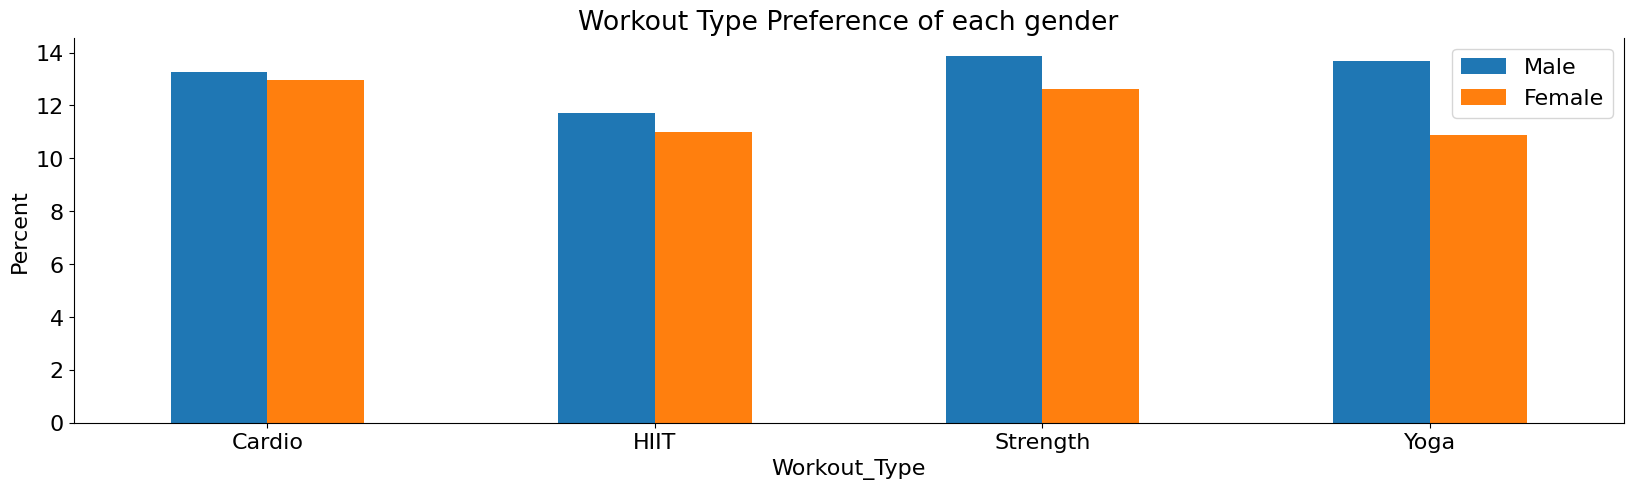

In [13]:
query = '''
select Workout_Type, 
        round(sum(case when Gender='Male' then 1 else 0 end)*100.0/(select count(*) from exercise_data),2) as Male,
        round(sum(case when Gender='Female' then 1 else 0 end)*100.0/(select count(*) from exercise_data),2) as Female  
from exercise_data 
group by Workout_Type
order by Workout_Type
'''
pivot = pd.read_sql(query, conn)
pivot.set_index('Workout_Type').plot(kind='bar')
plt.title('Workout Type Preference of each gender')
plt.ylabel('Percent')
plt.xticks(rotation=0)
plt.show()

Observation

- Cardio is the most popular workout type for both genders.
- Males show a stronger preference for strength training, while yoga is less popular overall.

So What?

- <span style=" color: #0000FF;">Cardio presents a key marketing opportunity to attract diverse members.</span> Strength training requires targeted marketing to engage males effectively, and yoga needs improvement to increase participation.

Action

- Promote cardio programs through targeted campaigns.
- Market strength training to males with success stories and competitions.
- Revamp yoga offerings to make them more appealing.

In [14]:
query = '''
select Age_Group, 
       round(count(*)*100.0/(select count(*) from exercise_data),2) as member_pct
from exercise_data 
group by Age_Group 
order by member_pct desc
'''
Age_Group = pd.read_sql(query, conn)
Age_Group

,Age_Group,member_pct
0,46-55,26.10
1,36-45,23.43
2,26-35,22.61
3,18-25,16.96
4,56-65,10.89


In [15]:
query = '''
select '46-55' as Age, Workout_Type, 
       round(count(*)*100.0/(select count(*) from exercise_data),2) as member_pct
from exercise_data
where Age_Group = '46-55'
group by Workout_Type 
order by member_pct desc
'''
Workout_Type_Age = pd.read_sql(query, conn)
Workout_Type_Age

,Age,Workout_Type,member_pct
0,46-55,Strength,6.78
1,46-55,HIIT,6.78
2,46-55,Yoga,6.37
3,46-55,Cardio,6.17


- Observation :  Most members (26.10%) are in the 46-55 age group, and they prefer both Strength and HIIT training.
- So what? : <span style=" color: #0000FF;">Individuals in the age group 46-55 are increasingly focused on health and fitness</span> , seeking ways to build muscle, which can enhance metabolism and improve overall well-being.
- Action : Target marketing efforts towards the 46-55 age group by enhancing gym offerings, including more strength training machines and HIIT classes. Implement marketing schemes and promotions tailored specifically for this demographic to encourage sign-ups and engagement.

**Additional Consideration**

The gym can also consider mentioning the potential for retaining this age group by offering classes or workshops that educate them on the benefits of strength training and HIIT, further emphasizing their importance in a well-rounded fitness routine.

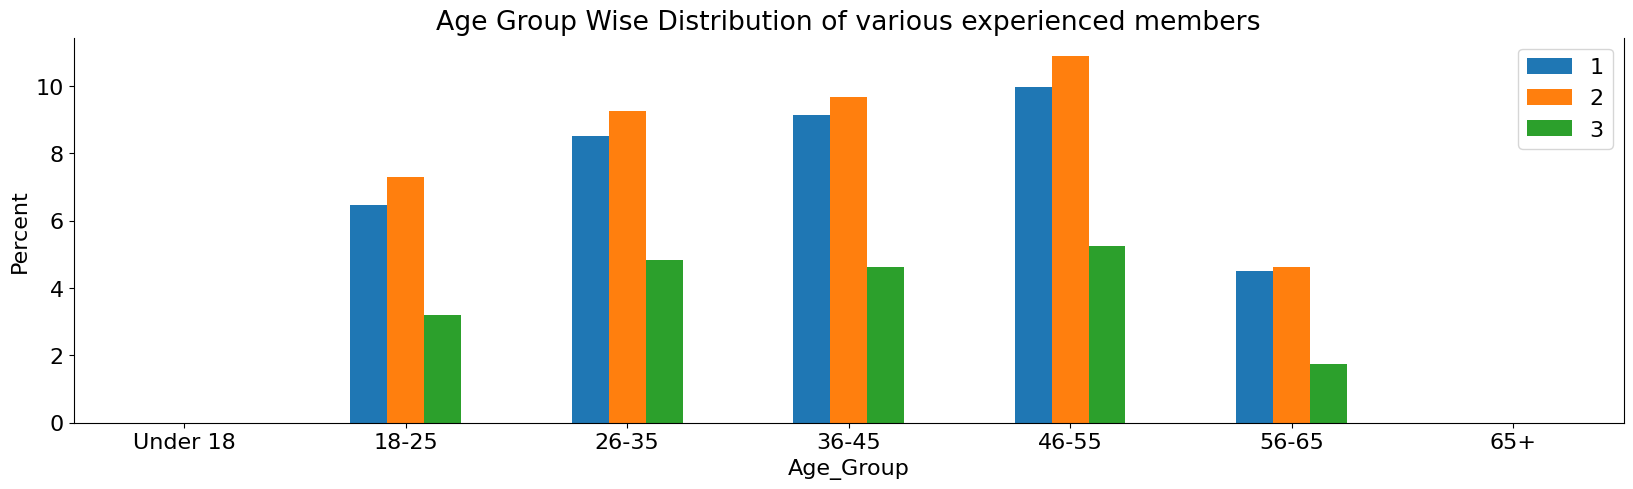

In [16]:
Experience_Level = round((df.pivot_table(index='Age_Group', columns='Experience_Level', aggfunc='size', fill_value=0)/len(df)*100),2)\
                                .reset_index().rename_axis(columns=None)
Experience_Level.set_index('Age_Group').plot(kind='bar')
plt.title('Age Group Wise Distribution of various experienced members')
plt.ylabel('Percent')
plt.xticks(rotation=0)
plt.show()

Observation

- The age group 46-55 has the highest percentages across all experience levels (1, 2, and 3 years), indicating a significant presence in the gym.
- The 36-45 and 26-35 age groups also show considerable percentages, making them notable demographics as well.

So What?

- <span style=" color: #0000FF;">The strong representation of individuals aged 46-55 across varying experience levels suggests they are actively engaged in fitness</span>. This demographic is likely looking for tailored programs that meet their specific health and fitness needs.
- Additionally, the presence of members aged 26-45 indicates a broader target market for gym services, highlighting the importance of addressing the needs of a wide range of age groups.

Action

- Focus marketing efforts on the 26-55 age range, particularly emphasizing programs and equipment that cater to the 46-55 demographic (which is backed by previous table and observations).
- Develop targeted promotional campaigns, such as workshops, fitness classes, dance classes, zumba sessions and tailored training programs, to engage this age group and enhance retention.
- Consider offering introductory classes or incentives to attract younger demographics (18-25) while maintaining strong engagement with the older crowd.

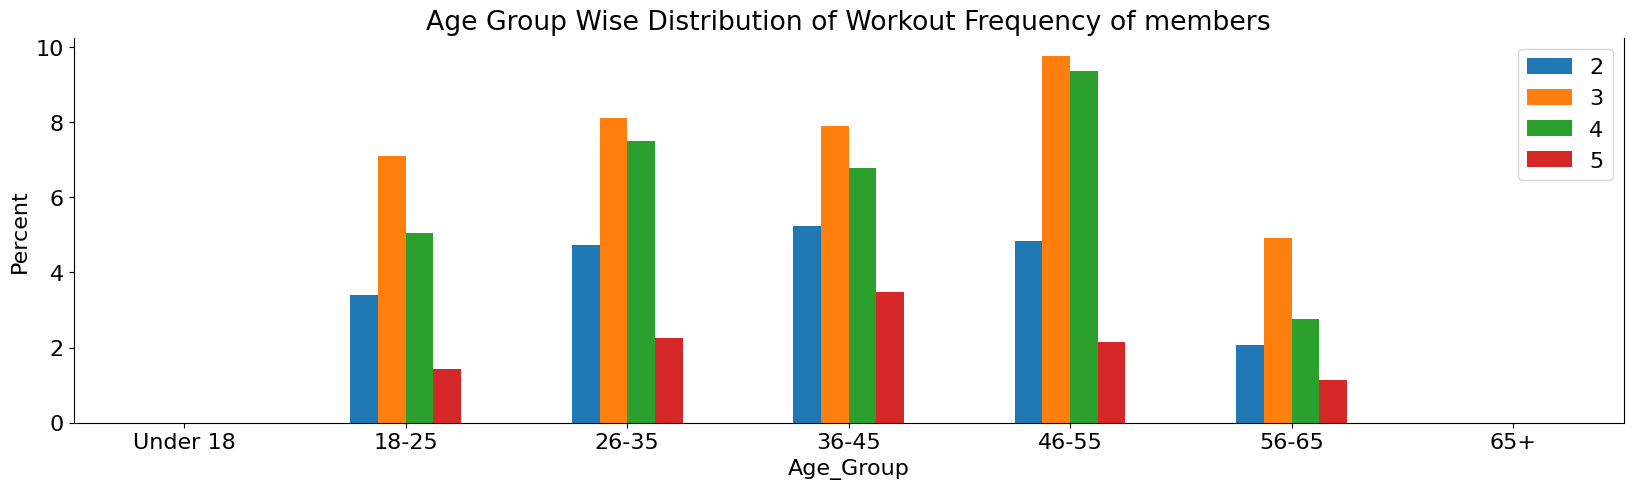

In [17]:
Workout_Frequency = round((df.pivot_table(index='Age_Group', columns='Workout_Frequency', aggfunc='size', fill_value=0)/len(df)*100),2)\
                                .reset_index().rename_axis(columns=None)
Workout_Frequency.set_index('Age_Group').plot(kind='bar')
plt.title('Age Group Wise Distribution of Workout Frequency of members')
plt.ylabel('Percent')
plt.xticks(rotation=0)
plt.show()

Observation

- The age group 26-55 shows significant engagement with the gym, particularly those who attend 3, 4, and 5 days a week.
- The 18-25 age group has lower participation rates overall, but some members do attend regularly (especially 3 days a week).

So What?

- <span style=" color: #0000FF;">Focusing on the 26-55 age range (specifically those who attend 3-5 days a week) presents a prime opportunity for targeted marketing and program development</span>. This demographic is likely committed to their fitness journey and can be engaged with tailored offerings that meet their needs.
- While the 18-25 age group has lower representation, there’s potential for growth in this segment, indicating the importance of creating appealing programs to attract younger members.

Action

- Develop targeted marketing campaigns aimed at the 26-55 age group, emphasizing consistency in attendance (3-5 days a week) and designing programs that cater to their fitness goals.
- Introduce promotions or incentives for members who attend regularly, enhancing engagement and retention among this demographic.
- Consider creating introductory programs or special classes aimed at the 18-25 age group to boost their participation while not over-investing compared to the more engaged demographics.

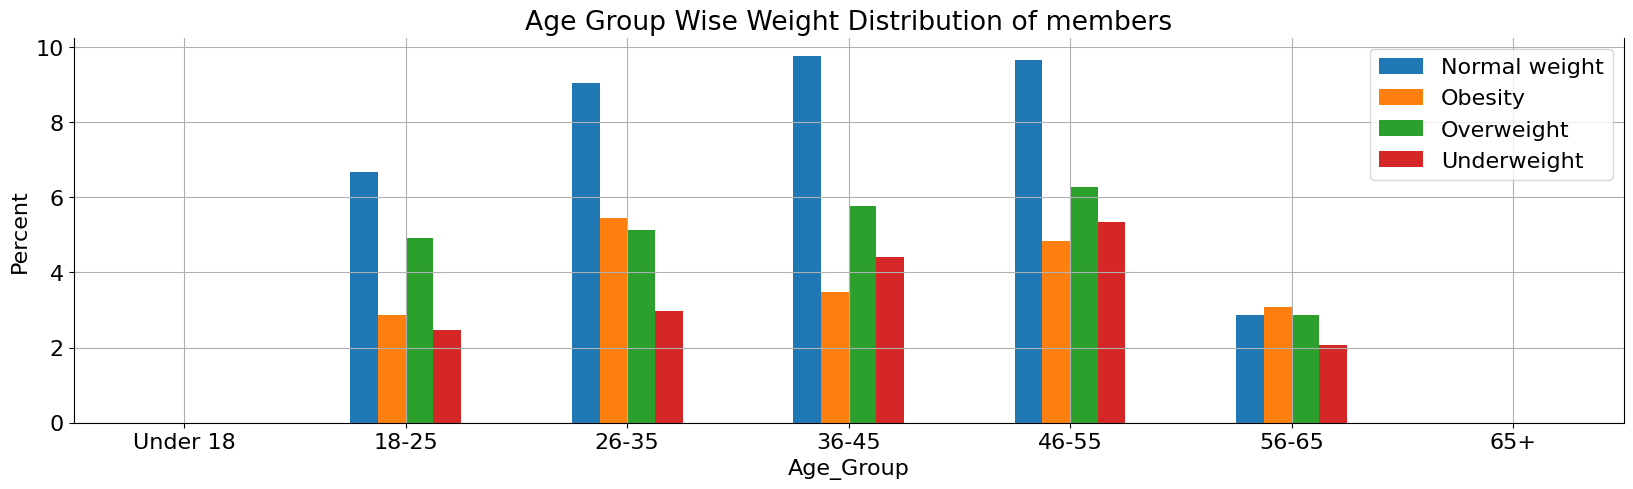

In [18]:
Weight_Category = round((df.pivot_table(index='Age_Group', columns='Weight_Category', aggfunc='size', fill_value=0)/len(df)*100),2)\
                                .reset_index().rename_axis(columns=None)
Weight_Category.set_index('Age_Group').plot(kind='bar')
plt.title('Age Group Wise Weight Distribution of members')
plt.ylabel('Percent')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

Observations: 

- The age group 26-35 has the highest percentage of normal weight members (9.04%), while 46-55 shows notable obesity (4.83%) and overweight (6.27%), indicating a need for targeted weight loss programs. Additionally, the 18-25 group has a higher percentage of underweight individuals (2.47%), suggesting a focus on health improvement for younger members.

So What?

- The significant percentage of <span style=" color: #0000FF;">members with obesity and overweight in the 46-55 age group suggests that the gym should develop targeted weight loss programs and nutritional guidance aimed specifically at this demographic.</span> 
-  <span style=" color: #0000FF;">High normal weight percentages in younger groups (18-35) indicate opportunities </span> to focus on maintenance and enhancement of fitness levels through advanced classes or competitions. 
- Highlighting success stories and promoting programs that support weight management could attract more members in the overweight and obese categories.

Action

1. Develop Specific Programs:
    - Implement weight management programs focusing on education and practical strategies for the 46-55 age group.
    - Offer fitness assessments and personalized training for those identified as overweight or obese.
2. Create Engaging Content: Develop marketing content that resonates with younger members focusing on the benefits of maintaining fitness and healthy lifestyles to prevent future health issues.
3. Promote Community Engagement:  Host workshops or seminars on nutrition and fitness for middle-aged members to help them understand their health better.
4. Fitness Challenges: Introduce challenges that encourage participation from various weight categories, fostering a supportive community atmosphere.

In [19]:
query = '''

with cte as (SELECT 
        CASE 
            WHEN Fat_Percentage < 15 THEN 'Low'
            WHEN Fat_Percentage >= 15 AND Fat_Percentage < 25 THEN 'Moderate'
            WHEN Fat_Percentage >= 25 THEN 'High'
            ELSE 'Unknown'
        END AS Fat_Category
    FROM exercise_data)
    
select Fat_Category, round(count(Fat_Category)*100.0/(select count(*) from exercise_data),2) as member_pct
from cte 
group by Fat_Category 
order by member_pct desc
       
'''
Fat_Percentage = pd.read_sql(query, conn)
Fat_Percentage

,Fat_Category,member_pct
0,High,59.40
1,Moderate,30.42
2,Low,10.17


- Observation: The majority of members fall under the High fat category (59.40%), while only a small portion is in the Low fat category (10.17%).
- So What?: <span style=" color: #0000FF;">This distribution suggests a high need for programs focused on fat reduction and body composition improvement among members.</span>
- Action: Introduce targeted fitness programs and nutrition guidance and market them using fliers or social media ads to engage and support members with higher body fat percentages, enhancing health outcomes and potentially boosting gym engagement.

## Key Insights

1. Strength Training Popularity: A significant 26.52% of members prefer strength training, indicating a focus on muscle building rather than just aesthetics.
2. Gender Disparity: Males make up 52.52% of gym members, suggesting they prioritize fitness more than females. This demographic represents potential for targeted female engagement strategies.
3. Cardio as a Key Offering: Cardio workouts are the most popular across genders, highlighting an opportunity for diverse marketing strategies to attract new members.
4. Age Demographics: The 46-55 age group constitutes the largest portion of members (26.10%) and shows a preference for strength and HIIT training, while younger members (18-25) show lower participation rates.
5. Weight and Body Fat Categories: There’s a notable presence of overweight (6.27%) and obese (4.83%) members in the 46-55 age group, suggesting a need for targeted weight loss programs. High fat levels (59.40%) across the membership also indicate a demand for fat reduction initiatives.

## Recommended Actions

1. Expand Strength Training Facilities: Increase the number of strength training machines and develop targeted programs to enhance muscle building among members.
2. Target Female Engagement: Implement marketing strategies that cater specifically to female members, including female-focused classes and a welcoming environment.
3. Promote Cardio Programs: Launch targeted marketing campaigns around cardio workouts, emphasizing community success stories to attract a diverse member base.
4. Focus on the 46-55 Age Group: Tailor marketing and gym offerings to this demographic, enhancing HIIT and strength training classes while promoting health benefits.
5. Develop Targeted Weight Management Programs: Implement weight loss initiatives and nutritional guidance for members categorized as overweight and obese, alongside workshops on maintaining a healthy lifestyle for younger demographics.
6. Enhance Community Engagement: Foster community through workshops, fitness challenges, and specialized classes, encouraging participation from diverse age and weight categories.